<a href="https://colab.research.google.com/github/reza-debug/Deep_learning_Projects/blob/main/detect_handwrite_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


### Load Dataset 🤙

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(train_features,train_labels) , (test_features,test_labels) = mnist.load_data()

In [ ]:
train_features.shape , test_features.shape

((60000, 28, 28), (10000, 28, 28))

### see an example of dataset 😏


5


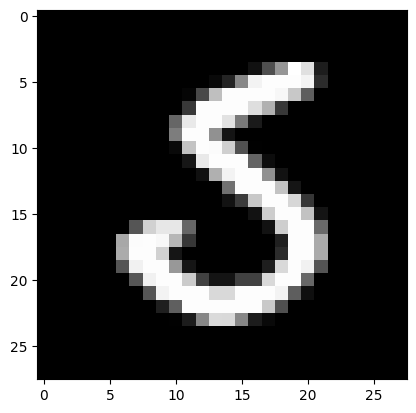

In [ ]:
idx = 138
img = train_features[idx]
print(train_labels[idx])

plt.gray()
plt.imshow(img)

# Preprocessing 🧑

## Normalize (0-1) 🌄

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  17,  79, 150, 255, 224,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9,  36, 135, 244, 253, 253, 253, 244,  45,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
np.min(img), np.max(img)

(0, 255)

In [ ]:
train_features[138]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  17,  79, 150, 255, 224,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9,  36, 135, 244, 253, 253, 253, 244,  45,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#just devide to 255 all data by float-->.0
train_features = train_features/255.0
test_features = test_features/255.0

In [ ]:
train_features[138]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  17,  79, 150, 255, 224,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9,  36, 135, 244, 253, 253, 253, 244,  45,   0,   0,   0,   0,
          0,   0],
       [  

# Model Difinition 🏛

In [ ]:
model = keras.Sequential()
#flatten for flat matrix of picture
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
#10 class so 10 noron
#softmax for ditect max output
model.add(keras.layers.Dense(units=10,activation='Softmax'))

# Compile 🐾

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),loss= tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

## fix inpute shape 👿

In [ ]:
#None for first flat layer and 28*28 for other layer
#if do not that with build or in first layer can't show summary of model
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(train_features,train_labels, epochs=1000, batch_size=256, validation_data=(test_features,test_labels))

Epoch 1/1000
235/235 [==============================] - 4s 5ms/step - loss: 0.4035 - accuracy: 0.8898 - val_loss: 0.1861 - val_accuracy: 0.9451
Epoch 2/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.1550 - accuracy: 0.9556 - val_loss: 0.1315 - val_accuracy: 0.9614
Epoch 3/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.1097 - accuracy: 0.9677 - val_loss: 0.1034 - val_accuracy: 0.9694
Epoch 4/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9745 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 5/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9807 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 6/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0528 - accuracy: 0.9844 - val_loss: 0.0785 - val_accuracy: 0.9762
Epoch 7/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0771 - val_accuracy:

In [ ]:
#if we dont set validation_data on model we can evalute by this
model.evaluate(test_features,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.9822


[0.28618931770324707, 0.982200026512146]

# Predict 🤖

6


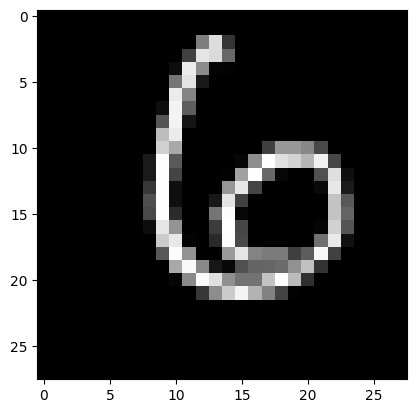

In [ ]:
#choose one of data in test for predict by model(number 100 from test data)
img = test_features[100]
print(test_labels[100])
plt.gray()
plt.imshow(img)


In [ ]:
#model.predict(img) is wrong because its 28*28 and expect -1,784(28*28)
model.predict(np.reshape(img,(-1,784)))

1/1 [==============================] - 0s 93ms/step


array([[1.1341641e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.5099829e-36, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
#elemane 6om 1 shode pas its 6